
# **Projeto final da disciplina de Modelos Descritivos**

### APRENDIZAGEM NÃO SUPERVISIONADA: AGRUPAMENTO



#### Time 3 - Fabio Cardoso, John Wesley, Felipe Barbosa e Rogério Fernandes

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/datasets/fernandol/countries-of-the-world

In [ ]:
pip install pycountry

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import pycountry
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/countries of the world.csv')

In [ ]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

**Alterando nomes das colunas**

In [ ]:
df.head(2)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"


In [ ]:
df.rename(columns={'Country': 'País',
                   'Region': 'Região',
                   'Population': 'População',
                   'Area (sq. mi.)': 'Área (m²)',
                   'Pop. Density (per sq. mi.)':'Pop. Densidade (por milha quadrada)',
                   'Coastline (coast/area ratio)':'Litoral (relação costa/área)',
                   'Net migration':'Migração líquida',
                   'Infant mortality (per 1000 births)':'Mortalidade infantil (por 1000 nascimentos)',
                   'GDP ($ per capita)':'PIB ($ per capita)',
                   'Literacy (%)':'Alfabetização (%)',
                   'Phones (per 1000)':'Telefones (por 1.000)',
                   'Arable (%)':'Terras produtivas (%)',
                   'Crops (%)':'Plantações (%)',
                   'Other (%)':'Outro (%)',
                   'Climate':'Clima',
                   'Birthrate':'Taxa de natalidade',
                   'Deathrate':'Índice de mortalidade',
                   'Agriculture':'Agricultura',
                   'Industry':'Industria',
                   'Service':'Serviços'}, inplace=True)

In [ ]:
df.columns

Index(['País', 'Região', 'População', 'Área (m²)',
       'Pop. Densidade (por milha quadrada)', 'Litoral (relação costa/área)',
       'Migração líquida', 'Mortalidade infantil (por 1000 nascimentos)',
       'PIB ($ per capita)', 'Alfabetização (%)', 'Telefones (por 1.000)',
       'Terras produtivas (%)', 'Plantações (%)', 'Outro (%)', 'Clima',
       'Taxa de natalidade', 'Índice de mortalidade', 'Agricultura',
       'Industria', 'Serviços'],
      dtype='object')

**Valores Missing (NAN)**

In [ ]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

País                                            0
Região                                          0
População                                       0
Área (m²)                                       0
Pop. Densidade (por milha quadrada)             0
Litoral (relação costa/área)                    0
Migração líquida                                3
Mortalidade infantil (por 1000 nascimentos)     3
PIB ($ per capita)                              1
Alfabetização (%)                              18
Telefones (por 1.000)                           4
Terras produtivas (%)                           2
Plantações (%)                                  2
Outro (%)                                       2
Clima                                          22
Taxa de natalidade                              3
Índice de mortalidade                           4
Agricultura                                    15
Industria                                      16
Serviços                                       15


**Análise dos tipos de atributos.**

In [ ]:
df.dtypes

País                                            object
Região                                          object
População                                        int64
Área (m²)                                        int64
Pop. Densidade (por milha quadrada)             object
Litoral (relação costa/área)                    object
Migração líquida                                object
Mortalidade infantil (por 1000 nascimentos)     object
PIB ($ per capita)                             float64
Alfabetização (%)                               object
Telefones (por 1.000)                           object
Terras produtivas (%)                           object
Plantações (%)                                  object
Outro (%)                                       object
Clima                                           object
Taxa de natalidade                              object
Índice de mortalidade                           object
Agricultura                                     object
Industria 

**Transformando o tipo de dados**

In [ ]:
# Substituindo a vírgula por ponto na coluna do DataFrame e transformando de object para float
df['Pop. Densidade (por milha quadrada)'] = df['Pop. Densidade (por milha quadrada)'].apply(lambda x: x.replace(",", "."))
df['Pop. Densidade (por milha quadrada)'] = df['Pop. Densidade (por milha quadrada)'].astype(float)

In [ ]:
df['Litoral (relação costa/área)'] = df['Litoral (relação costa/área)'].apply(lambda x: x.replace(",", "."))
df['Litoral (relação costa/área)'] = df['Litoral (relação costa/área)'].astype(float)

In [ ]:
# Número elevado de resgistros com valor 0.0. Dropar a coluna.
df.loc[df['Litoral (relação costa/área)'] == 0.0].shape

(44, 20)

In [ ]:
# Nesta coluna, além dos valores NaN, há valores INT
df['Migração líquida'] = df['Migração líquida'].fillna('0,0')

In [ ]:
df['Migração líquida'].values

array(['23,06', '-4,93', '-0,39', '-20,71', '6,6', '0', '10,76', '-6,15',
       '0,61', '-6,47', '0', '3,98', '2', '-4,9', '-2,2', '1,05', '-0,71',
       '-0,31', '2,54', '1,23', '0', '0', '2,49', '0', '-1,32', '0,31',
       '0', '-0,03', '10,01', '3,59', '-4,58', '0', '-1,8', '-0,06', '0',
       '0', '5,96', '-12,07', '18,75', '0', '-0,11', '0', '-0,4', '-0,31',
       '0', '0', '-0,17', '0,0', '0,51', '-0,07', '1,58', '-1,58', '0,43',
       '0,97', '2,48', '0', '-13,87', '-3,22', '0', '-8,58', '-0,22',
       '-3,74', '0', '0', '-3,16', '0', '1,41', '-3,14', '0,95', '0,66',
       '6,27', '2,94', '0', '1,57', '1,6', '-4,7', '2,18', '-0,64', '0',
       '2,35', '-8,37', '-13,92', '-0,15', '0', '-1,67', '3,84', '-3,06',
       '-1,57', '-2,07', '-3,4', '-1,99', '5,24', '0,86', '2,38', '-0,07',
       '0', '-0,84', '0', '4,99', '5,36', '0,68', '2,07', '-4,92', '0',
       '2,76', '6,59', '-3,35', '-0,1', '0', '0', '0', '14,18', '-2,45',
       '0', '-2,23', '0', '-0,74', '0', '0', 

In [ ]:
# Substituindo os valores 'INT'
df['Migração líquida'][221] = '0,0'
df['Migração líquida'][223] = '0,0'
df['Migração líquida'][47] = '0,0'


<ipython-input-20-cba4dd28c3dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Migração líquida'][221] = '0,0'
<ipython-input-20-cba4dd28c3dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Migração líquida'][223] = '0,0'
<ipython-input-20-cba4dd28c3dc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Migração líquida'][47] = '0,0'


In [ ]:
df['Migração líquida'] = df['Migração líquida'].apply(lambda x: x.replace(",", "."))

In [ ]:
df['Migração líquida'] = df['Migração líquida'].astype(float)

In [ ]:
df[df['Migração líquida']==0].shape
# Número muito alto de dados com valor 0.0. Retirar a coluna para o modelo de agrupamento

(65, 20)

In [ ]:
df['Telefones (por 1.000)'] = df['Telefones (por 1.000)'].fillna('0,0')
df['Telefones (por 1.000)'] = df['Telefones (por 1.000)'].apply(lambda x: x.replace(",", "."))
df['Telefones (por 1.000)'] = df['Telefones (por 1.000)'].astype(float)
df[df['Telefones (por 1.000)'] == 0].shape
# Número baixo de dados com valor 0.0. Substituir pela média ou pela mediana


(4, 20)

In [ ]:
df['Telefones (por 1.000)'].describe()

count     227.000000
mean      231.901762
std       228.099042
min         0.000000
25%        33.050000
50%       164.100000
75%       382.900000
max      1035.600000
Name: Telefones (por 1.000), dtype: float64

In [ ]:
# Decisão de usar a mediana para substituir os dados com valor 0.0
x = df.loc[df['Telefones (por 1.000)'] == 0.0].index
x

Int64Index([52, 58, 140, 223], dtype='int64')

In [ ]:
for i in range(len(x)):
  df['Telefones (por 1.000)'][x[i]] = df['Telefones (por 1.000)'].median()



<ipython-input-27-d7d2fd1c4e5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Telefones (por 1.000)'][x[i]] = df['Telefones (por 1.000)'].median()
<ipython-input-27-d7d2fd1c4e5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Telefones (por 1.000)'][x[i]] = df['Telefones (por 1.000)'].median()
<ipython-input-27-d7d2fd1c4e5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Telefones (por 1.000)'][x[i]] = df['Telefones 

In [ ]:
df['Terras produtivas (%)'] = df['Terras produtivas (%)'].fillna('0,0')
df['Terras produtivas (%)'] = df['Terras produtivas (%)'].apply(lambda x: x.replace(",", "."))
df['Terras produtivas (%)'] = df['Terras produtivas (%)'].astype(float)

In [ ]:
df[df['Terras produtivas (%)'] == 0.0].shape
# Número elevado de registros com valor 0.0. Decisão dropar essa coluna.

(11, 20)

In [ ]:
df['Plantações (%)'] = df['Plantações (%)'].fillna('0,0')
df['Plantações (%)'] = df['Plantações (%)'].apply(lambda x: x.replace(",", "."))
df['Plantações (%)'] = df['Plantações (%)'].astype(float)

In [ ]:
df[df['Plantações (%)'] == 0.0].shape
# Número elevado de registros com valor 0.0. Dropar essa coluna.

(30, 20)

In [ ]:
df['Outro (%)'] = df['Outro (%)'].fillna('0,0')
df['Outro (%)'] = df['Outro (%)'].apply(lambda x: x.replace(",", "."))
df['Outro (%)'] = df['Outro (%)'].astype(float)

In [ ]:
df[df['Outro (%)'] == 0.0].shape

(2, 20)

In [ ]:
df['Outro (%)'].describe()

count    227.000000
mean      80.919031
std       17.795561
min        0.000000
25%       70.875000
50%       85.380000
75%       95.230000
max      100.000000
Name: Outro (%), dtype: float64

In [ ]:
# Valores da média e da mediana bem próximos. Neste caso utilizarei a média.
x = df.loc[df['Outro (%)'] == 0.0].index
x


Int64Index([85, 134], dtype='int64')

In [ ]:
for i in range(len(x)):
  df['Outro (%)'][x[i]] = df['Outro (%)'].mean()
df[df['Outro (%)'] == 0.0].shape

<ipython-input-36-c6e74662011b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outro (%)'][x[i]] = df['Outro (%)'].mean()


(0, 20)

In [ ]:
df['Taxa de natalidade'] = df['Taxa de natalidade'].fillna("0,0")
df['Taxa de natalidade'] = df['Taxa de natalidade'].apply(lambda x: x.replace(",", "."))
df['Taxa de natalidade'] = df['Taxa de natalidade'].astype(float)

In [ ]:
df[df['Taxa de natalidade'] == 0.0].shape

(3, 20)

In [ ]:
# Número baixo de registros com valor 0.0. Fazer a substiruição pela média ou pela mediana
df['Taxa de natalidade'].describe()

count    227.000000
mean      21.822467
std       11.387139
min        0.000000
25%       12.350000
50%       18.710000
75%       29.770000
max       50.730000
Name: Taxa de natalidade, dtype: float64

In [ ]:
# Valor da média e da mediana muito próximo. Adotar a média para a substiruição dos resgistros com valor 0.0
x = df.loc[df['Taxa de natalidade'] == 0.0].index
x


Int64Index([181, 221, 223], dtype='int64')

In [ ]:
for i in range(len(x)):
  df['Taxa de natalidade'][x[i]] = df['Taxa de natalidade'].mean()
df[df['Taxa de natalidade'] == 0.0].shape

<ipython-input-41-2f204a397cb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Taxa de natalidade'][x[i]] = df['Taxa de natalidade'].mean()


(0, 20)

In [ ]:
df['Índice de mortalidade'] = df['Índice de mortalidade'].fillna('0,0')
df['Índice de mortalidade'] = df['Índice de mortalidade'].apply(lambda x: x.replace(",", "."))
df['Índice de mortalidade'] = df['Índice de mortalidade'].astype(float)

In [ ]:
df[df['Índice de mortalidade'] == 0.0].shape

(4, 20)

In [ ]:
df['Índice de mortalidade'].describe()

count    227.000000
mean       9.078502
std        5.093580
min        0.000000
25%        5.755000
50%        7.820000
75%       10.580000
max       29.740000
Name: Índice de mortalidade, dtype: float64

In [ ]:
# Média e Mediana com valores próximos. Irei utilizar a média
x = df.loc[df['Índice de mortalidade'] == 0.0].index
x


Int64Index([47, 181, 221, 223], dtype='int64')

In [ ]:
for i in range(len(x)):
  df['Índice de mortalidade'][x[i]] = df['Índice de mortalidade'].mean()
df[df['Índice de mortalidade'] == 0.0].shape

<ipython-input-46-eb539cb73918>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Índice de mortalidade'][x[i]] = df['Índice de mortalidade'].mean()


(0, 20)

In [ ]:
df['Mortalidade infantil (por 1000 nascimentos)'] = df['Mortalidade infantil (por 1000 nascimentos)'].fillna('0,0')
df['Mortalidade infantil (por 1000 nascimentos)'] = df['Mortalidade infantil (por 1000 nascimentos)'].apply(lambda x: x.replace(",", "."))
df['Mortalidade infantil (por 1000 nascimentos)'] = df['Mortalidade infantil (por 1000 nascimentos)'].astype(float)

In [ ]:
df[df['Mortalidade infantil (por 1000 nascimentos)'] == 0.0].shape

(3, 20)

In [ ]:
x = df.loc[df['Mortalidade infantil (por 1000 nascimentos)'] == 0.0].index
x

Int64Index([47, 221, 223], dtype='int64')

In [ ]:
df['Mortalidade infantil (por 1000 nascimentos)'].describe()

count    227.000000
mean      35.037709
std       35.388330
min        0.000000
25%        7.825000
50%       20.910000
75%       55.335000
max      191.190000
Name: Mortalidade infantil (por 1000 nascimentos), dtype: float64

In [ ]:
# Valores da Média e da Mediana distantes. Irei utilizar o menor valor, que no caso é a mediana.
x = df.loc[df['Mortalidade infantil (por 1000 nascimentos)'] == 0.0].index
x


Int64Index([47, 221, 223], dtype='int64')

In [ ]:
for i in range(len(x)):
  df['Mortalidade infantil (por 1000 nascimentos)'][x[i]] = df['Mortalidade infantil (por 1000 nascimentos)'].mean()
df[df['Mortalidade infantil (por 1000 nascimentos)'] == 0.0].shape

<ipython-input-52-5259892f2142>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mortalidade infantil (por 1000 nascimentos)'][x[i]] = df['Mortalidade infantil (por 1000 nascimentos)'].mean()


(0, 20)

In [ ]:
df['PIB ($ per capita)'].fillna(df['PIB ($ per capita)'].mean(), inplace = True)

In [ ]:
df[df['PIB ($ per capita)'] == 0.0].shape

(0, 20)

In [ ]:
df['PIB ($ per capita)'].isnull().sum()

0

**Dataframe sem as colunas com registros incompletos**

In [ ]:
# Retirei as colunas com dados faltantes
# No caso da coluna 'Migração Líquida', retiramos pois depois da transformação dos dados, verificou-se 65 registros com valor 0.0

df2 = df.drop(labels = ['Alfabetização (%)',
                        'Clima',
                        'Agricultura',
                        'Industria',
                        'Serviços',
                        'Migração líquida',
                        'Terras produtivas (%)',
                        'Plantações (%)',
                        'Outro (%)'], axis=1)
df2.head(1)

,País,Região,População,Área (m²),Pop. Densidade (por milha quadrada),Litoral (relação costa/área),Mortalidade infantil (por 1000 nascimentos),PIB ($ per capita),Telefones (por 1.000),Taxa de natalidade,Índice de mortalidade
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,163.07,700.0,3.2,46.6,20.34


**Incluir uma coluna com os dados Iso_alpha_3 para o PyCountry**

In [ ]:
#CRIANDO UMA COLUNA COM O ISO_ALPHA_3 PARA O GRÁFICO DP MAPA
input_countries = df['País']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]
df['Codes'] = codes

In [ ]:
df['Codes'].value_counts()

Unknown code    227
Name: Codes, dtype: int64

In [ ]:
# Ocorreu algum erro que o pycoutry não criou os códigos dos países
df['País'].values

array(['Afghanistan ', 'Albania ', 'Algeria ', 'American Samoa ',
       'Andorra ', 'Angola ', 'Anguilla ', 'Antigua & Barbuda ',
       'Argentina ', 'Armenia ', 'Aruba ', 'Australia ', 'Austria ',
       'Azerbaijan ', 'Bahamas, The ', 'Bahrain ', 'Bangladesh ',
       'Barbados ', 'Belarus ', 'Belgium ', 'Belize ', 'Benin ',
       'Bermuda ', 'Bhutan ', 'Bolivia ', 'Bosnia & Herzegovina ',
       'Botswana ', 'Brazil ', 'British Virgin Is. ', 'Brunei ',
       'Bulgaria ', 'Burkina Faso ', 'Burma ', 'Burundi ', 'Cambodia ',
       'Cameroon ', 'Canada ', 'Cape Verde ', 'Cayman Islands ',
       'Central African Rep. ', 'Chad ', 'Chile ', 'China ', 'Colombia ',
       'Comoros ', 'Congo, Dem. Rep. ', 'Congo, Repub. of the ',
       'Cook Islands ', 'Costa Rica ', "Cote d'Ivoire ", 'Croatia ',
       'Cuba ', 'Cyprus ', 'Czech Republic ', 'Denmark ', 'Djibouti ',
       'Dominica ', 'Dominican Republic ', 'East Timor ', 'Ecuador ',
       'Egypt ', 'El Salvador ', 'Equatorial Guinea

In [ ]:
# Há espaço no nome dos países. Solução: retirar os espaços em branco
df['País'] = df['País'].str.strip()
df['País'].values

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua & Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia & Herzegovina', 'Botswana', 'Brazil', 'British Virgin Is.',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Repub. of the',
       'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faroe Islands', 'Fiji', 

In [ ]:
df[df['Codes'] == 'GUF']

,País,Região,População,Área (m²),Pop. Densidade (por milha quadrada),Litoral (relação costa/área),Migração líquida,Mortalidade infantil (por 1000 nascimentos),PIB ($ per capita),Alfabetização (%),...,Terras produtivas (%),Plantações (%),Outro (%),Clima,Taxa de natalidade,Índice de mortalidade,Agricultura,Industria,Serviços,Codes


In [ ]:
# Rodar novamente o algoritimo do pycoutry
input_countries = df['País']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

codes = [countries.get(country, 'Unknown code') for country in input_countries]
df['Codes'] = codes

In [ ]:
df['Codes'].values

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'Unknown code',
       'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'Unknown code', 'BHR',
       'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN',
       'Unknown code', 'Unknown code', 'BWA', 'BRA', 'Unknown code',
       'Unknown code', 'BGR', 'BFA', 'Unknown code', 'BDI', 'KHM', 'CMR',
       'CAN', 'Unknown code', 'CYM', 'Unknown code', 'TCD', 'CHL', 'CHN',
       'COL', 'COM', 'Unknown code', 'Unknown code', 'COK', 'CRI',
       'Unknown code', 'HRV', 'CUB', 'CYP', 'Unknown code', 'DNK', 'DJI',
       'DMA', 'DOM', 'Unknown code', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'EST', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB',
       'Unknown code', 'Unknown code', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC',
       'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY',
       'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'Unknown code',
       'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR',
       

In [ ]:
# Ainda há dados sem o código. Solução: Fazer na mão
df['Codes'][169] = 'RUS'
df['Codes'][171] = 'SHN'
df['Codes'][172] = 'KNA'
df['Codes'][174] = 'SPM'
df['Codes'][178] = 'STP'
df['Codes'][194] = 'SWZ'
df['Codes'][197] = 'SYR'
df['Codes'][7] = 'ATG'
df['Codes'][14] = 'BHS'
df['Codes'][24] = 'BOL'
df['Codes'][25] = 'BIH'
df['Codes'][28] = 'VGB'
df['Codes'][29] = 'BRN'
df['Codes'][32] = 'MMR'
df['Codes'][37] = 'CPV'
df['Codes'][39] = 'CAF'
df['Codes'][45] = 'COD'
df['Codes'][46] = 'COG'
df['Codes'][49] = 'CIV'
df['Codes'][53] = 'CZE'
df['Codes'][58] = 'TLS'
df['Codes'][73] = 'GMB'
df['Codes'][96] = 'IRN'
df['Codes'][109] = 'PRK'
df['Codes'][113] = 'LAO'
df['Codes'][122] = 'MAC'
df['Codes'][123] = 'MKD'
df['Codes'][136] = 'FSM'
df['Codes'][137] = 'MDA'
df['Codes'][147] = 'ANT'
df['Codes'][153] = 'MNP'
df['Codes'][167] = 'REU'
df['Codes'][198] = 'TWN'
df['Codes'][200] = 'TZA'
df['Codes'][204] = 'TTO'
df['Codes'][206] = 'TUR'
df['Codes'][208] = 'TCA'
df['Codes'][219] = 'VNM'
df['Codes'][220] = 'VIR'
df['Codes'][110] = 'KOR'
df['Codes'][218] = 'VEN'



<ipython-input-64-15918fbe629c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Codes'][169] = 'RUS'
<ipython-input-64-15918fbe629c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Codes'][171] = 'SHN'
<ipython-input-64-15918fbe629c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Codes'][172] = 'KNA'
<ipython-input-64-15918fbe629c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
# Não há codigo para a Palestina
df[df['Codes'] == 'Unknown code']

,País,Região,População,Área (m²),Pop. Densidade (por milha quadrada),Litoral (relação costa/área),Migração líquida,Mortalidade infantil (por 1000 nascimentos),PIB ($ per capita),Alfabetização (%),...,Terras produtivas (%),Plantações (%),Outro (%),Clima,Taxa de natalidade,Índice de mortalidade,Agricultura,Industria,Serviços,Codes
74,Gaza Strip,NEAR EAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,...,28.95,21.05,50.00,3,39.45,3.80,"0,03","0,283","0,687",Unknown code
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,...,16.90,18.97,64.13,3,31.67,3.92,"0,09","0,28","0,63",Unknown code


**Dados Estatísticos**

In [ ]:
df2.describe()

,População,Área (m²),Pop. Densidade (por milha quadrada),Litoral (relação costa/área),Mortalidade infantil (por 1000 nascimentos),PIB ($ per capita),Telefones (por 1.000),Taxa de natalidade,Índice de mortalidade
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,35.502806,9689.823009,234.793392,22.112142,9.239536
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,35.154247,10026.881258,226.164338,11.102312,4.945692
min,7.026000e+03,2.000000e+00,0.000000,0.000000,2.290000,500.000000,0.200000,7.290000,2.290000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,8.215000,1900.000000,38.500000,12.725000,5.975000
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,21.050000,5600.000000,164.100000,18.900000,8.170000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,55.335000,15700.000000,382.900000,29.770000,10.580000
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,191.190000,55100.000000,1035.600000,50.730000,29.740000


## **PRÉ-PROCESSAMENTO**

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   País                                         227 non-null    object 
 1   Região                                       227 non-null    object 
 2   População                                    227 non-null    int64  
 3   Área (m²)                                    227 non-null    int64  
 4   Pop. Densidade (por milha quadrada)          227 non-null    float64
 5   Litoral (relação costa/área)                 227 non-null    float64
 6   Mortalidade infantil (por 1000 nascimentos)  227 non-null    float64
 7   PIB ($ per capita)                           227 non-null    float64
 8   Telefones (por 1.000)                        227 non-null    float64
 9   Taxa de natalidade                           227 non-null    float64
 10  Ín

###**Excluir atributos categóricos**

In [ ]:
df2 = df2.drop(labels = ['País','Região'], axis = 1)

In [ ]:
df2.head(2)

,População,Área (m²),Pop. Densidade (por milha quadrada),Litoral (relação costa/área),Mortalidade infantil (por 1000 nascimentos),PIB ($ per capita),Telefones (por 1.000),Taxa de natalidade,Índice de mortalidade
0,31056997,647500,48.0,0.00,163.07,700.0,3.2,46.60,20.34
1,3581655,28748,124.6,1.26,21.52,4500.0,71.2,15.11,5.22


###**Escalonamento**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [ ]:
df2_esc

array([[ 0.01969468,  0.02758332, -0.19984434, ..., -1.0262679 ,
         2.2105282 ,  2.24943167],
       [-0.21387688, -0.31879748, -0.15360296, ..., -0.72493712,
        -0.632086  , -0.81453096],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.69436091,
        -0.44883714, -0.93814321],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.87560251,
         1.8756251 , -0.19039043],
       [-0.14654488,  0.08642673, -0.21958445, ..., -1.00411123,
         1.70501409,  2.16634803],
       [-0.14029829, -0.11624192, -0.20992568, ..., -0.9216884 ,
         0.53240187,  2.55339622]])

## **K-MEANS COM DOIS ATRIBUTOS**

In [ ]:
df2.head(1)

,População,Área (m²),Pop. Densidade (por milha quadrada),Litoral (relação costa/área),Mortalidade infantil (por 1000 nascimentos),PIB ($ per capita),Telefones (por 1.000),Taxa de natalidade,Índice de mortalidade
0,31056997,647500,48.0,0.0,163.07,700.0,3.2,46.6,20.34


##**1º grupo (PIB (per capita) e Qtd de telefone)**

In [ ]:
dados_1 = df2.iloc[:, [5,6]].values

In [ ]:
dados_1

array([[7.00000000e+02, 3.20000000e+00],
       [4.50000000e+03, 7.12000000e+01],
       [6.00000000e+03, 7.81000000e+01],
       [8.00000000e+03, 2.59500000e+02],
       [1.90000000e+04, 4.97200000e+02],
       [1.90000000e+03, 7.80000000e+00],
       [8.60000000e+03, 4.60000000e+02],
       [1.10000000e+04, 5.49900000e+02],
       [1.12000000e+04, 2.20400000e+02],
       [3.50000000e+03, 1.95700000e+02],
       [2.80000000e+04, 5.16100000e+02],
       [2.90000000e+04, 5.65500000e+02],
       [3.00000000e+04, 4.52200000e+02],
       [3.40000000e+03, 1.37100000e+02],
       [1.67000000e+04, 4.60600000e+02],
       [1.69000000e+04, 2.81300000e+02],
       [1.90000000e+03, 7.30000000e+00],
       [1.57000000e+04, 4.81900000e+02],
       [6.10000000e+03, 3.19100000e+02],
       [2.91000000e+04, 4.62600000e+02],
       [4.90000000e+03, 1.15700000e+02],
       [1.10000000e+03, 9.70000000e+00],
       [3.60000000e+04, 8.51400000e+02],
       [1.30000000e+03, 1.43000000e+01],
       [2.400000

In [ ]:
features = ['PIB ($ per capita)', 'Telefones (por 1.000)']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

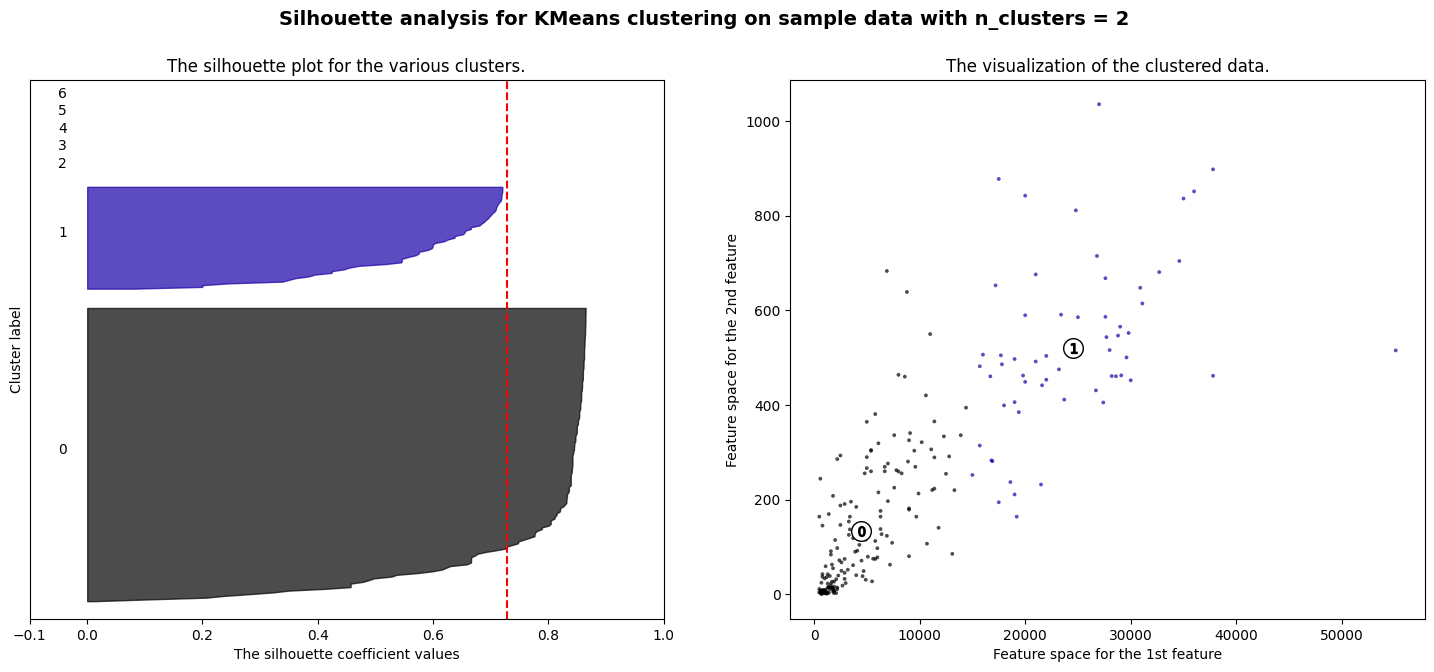

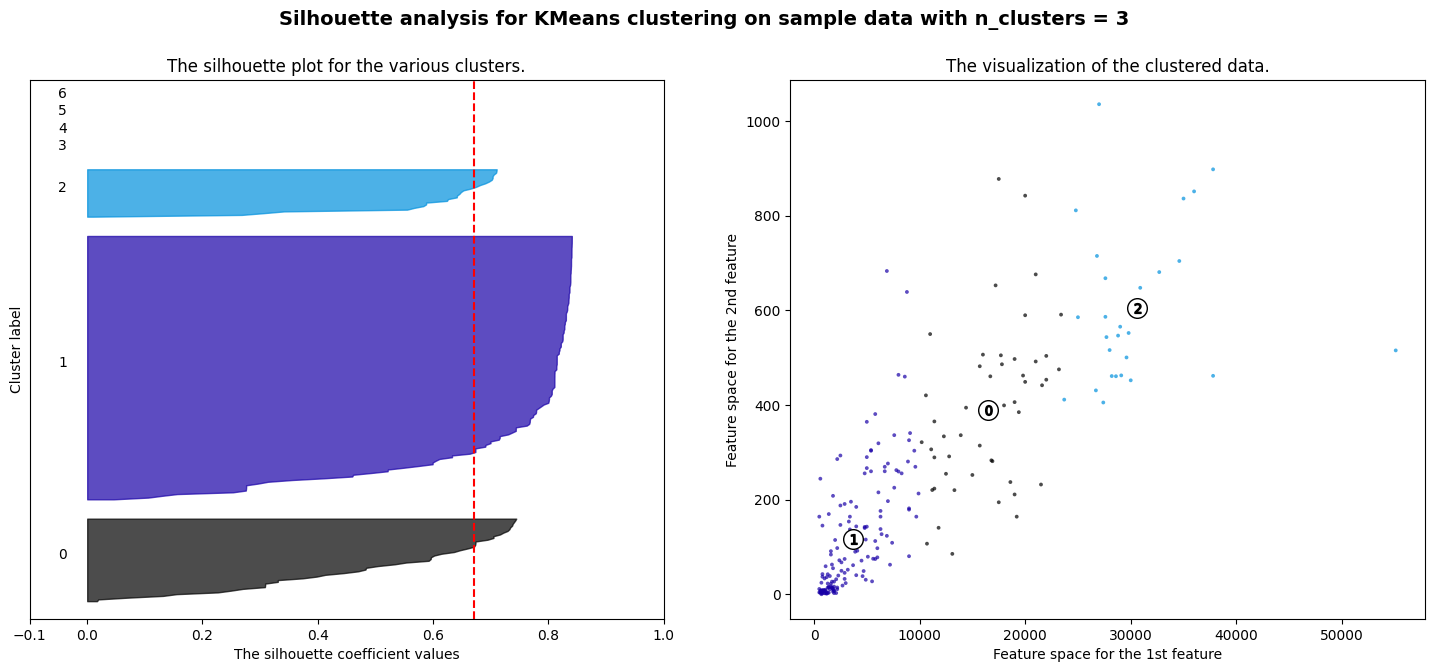

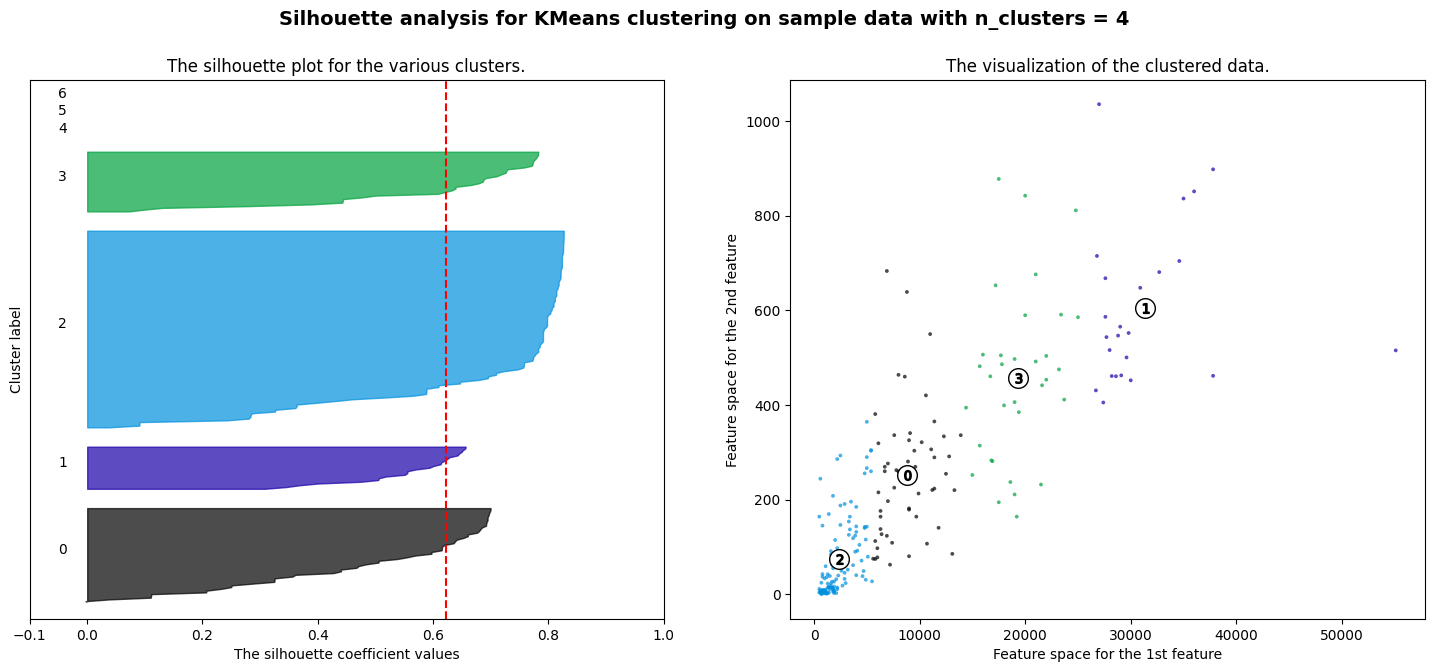

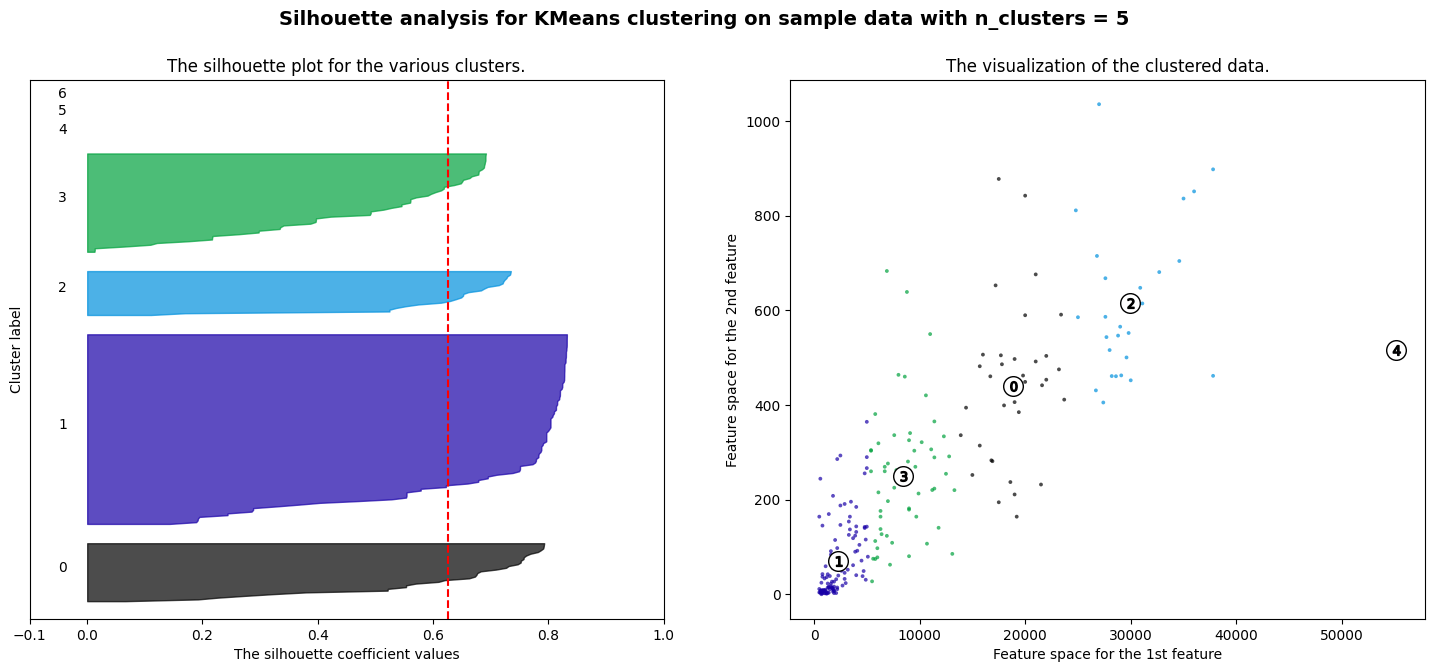

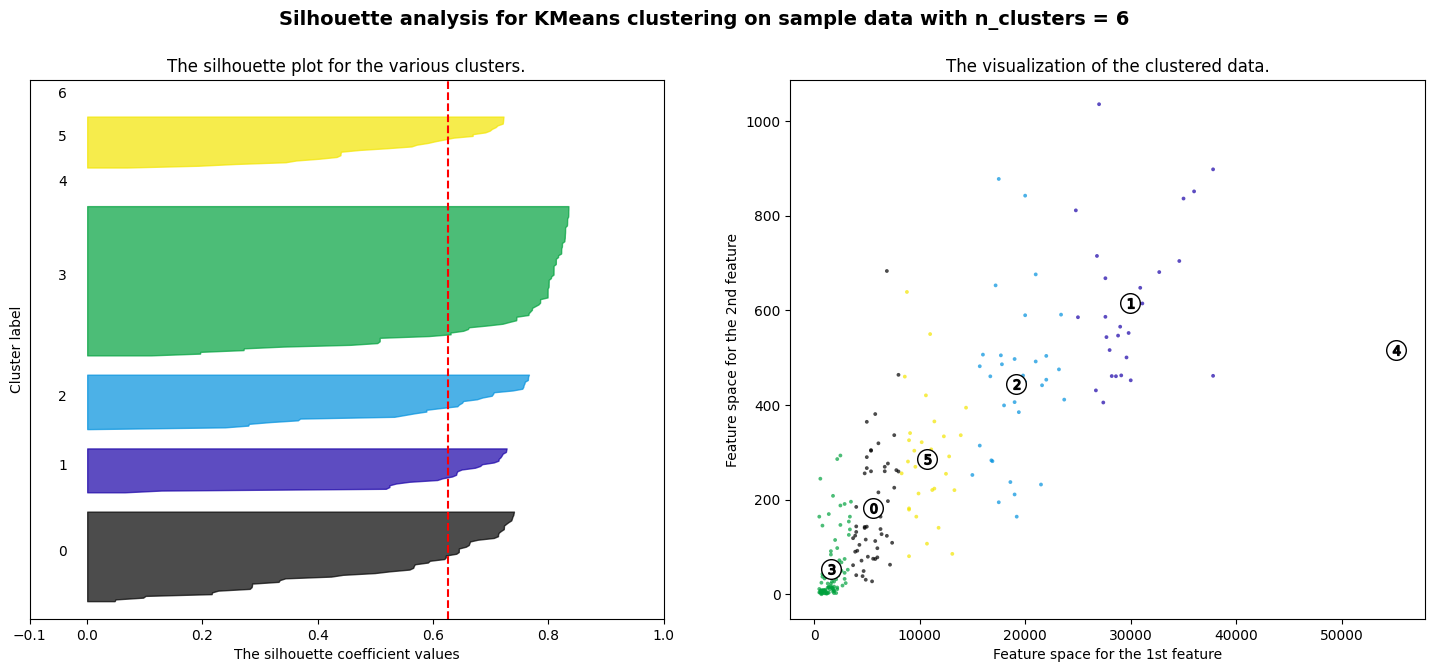

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Escolhendo o número de clusters usando o método do cotovelo (elbow method)
n_clusters = 7
inertia = []
silhouettes = []
clusters = range(2, n_clusters)

X = df2[features].copy()

for k in clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)

    labels = kmeans.predict(X)
    silh = silhouette_score(X, labels)

    silhouettes.append(silh)
    inertia.append(kmeans.inertia_)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silh, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(labels.astype(float) / n_clusters)

    d2_data = X[['PIB ($ per capita)', 'Telefones (por 1.000)']].values
    ax2.scatter(
        d2_data[:, 0], d2_data[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % k,
        fontsize=14,
        fontweight="bold",
    )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

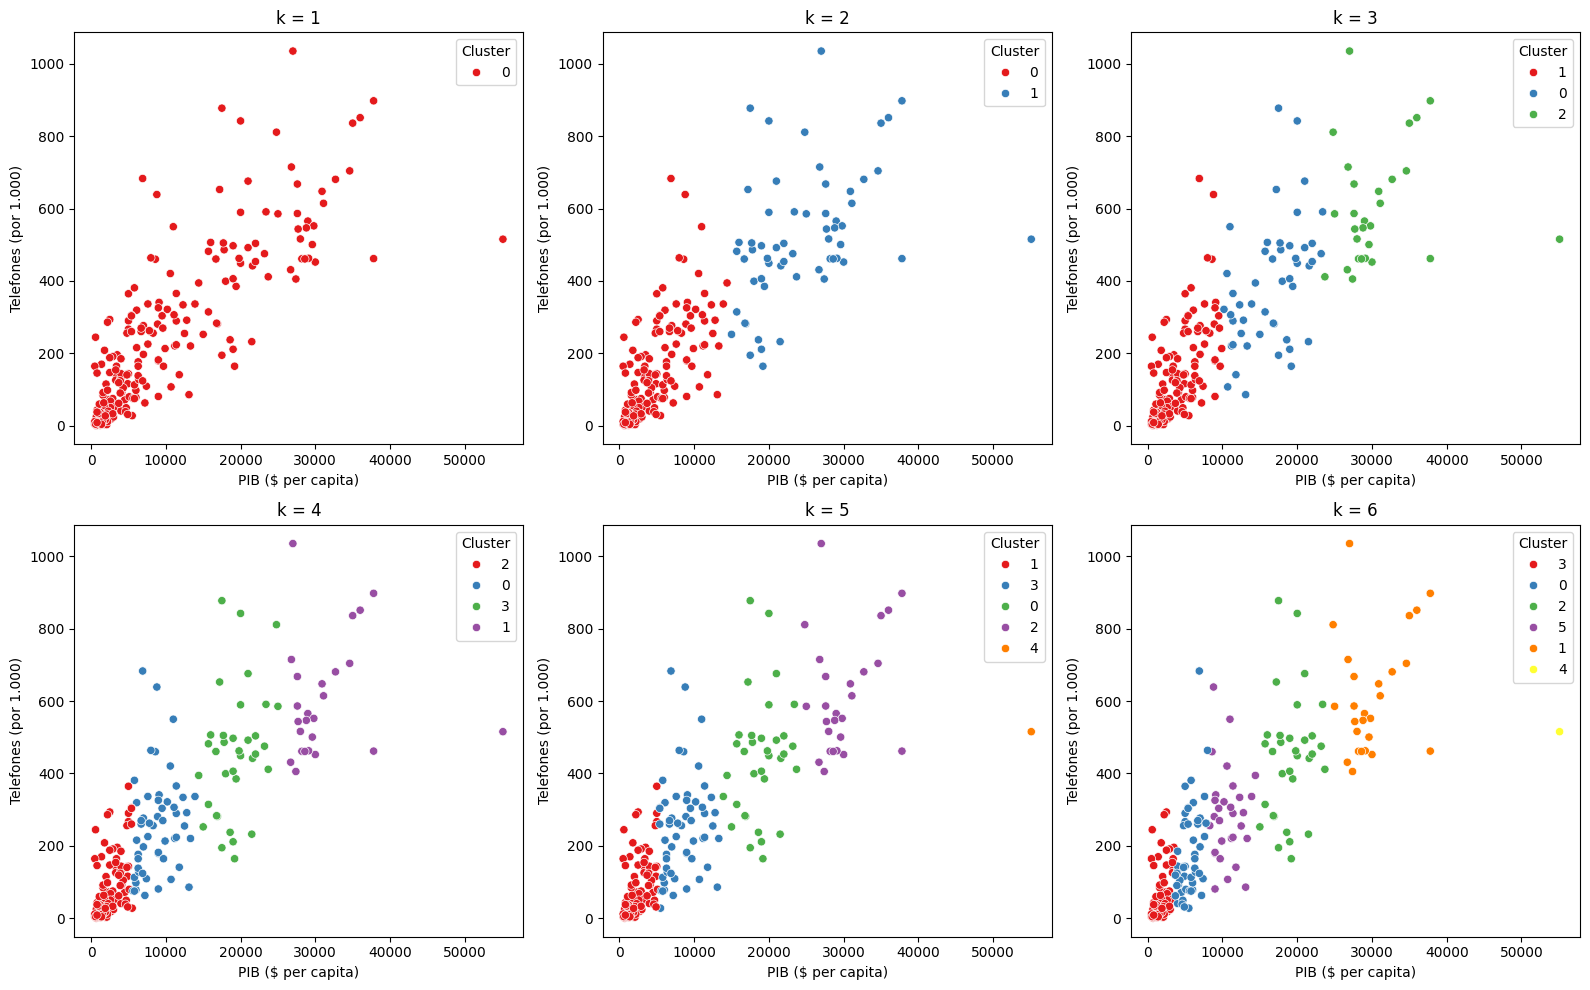

In [ ]:
# Define the number of clusters you want to visualize
num_clusters = 6

# Calculate the number of rows and columns for the grid of plots
rows = (num_clusters + 1) // 3
cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))

# Loop through each value of k
for k in range(1, num_clusters + 1):
    row = (k - 1) // cols
    col = (k - 1) % cols

    # Apply K-Means with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df2['Cluster'] = kmeans.fit_predict(df2[features])
    df2['Cluster'] = df2['Cluster'].astype(str)

    # Scatter plot of data points with cluster coloring
    sns.scatterplot(ax=axes[row, col], data=df2, x='PIB ($ per capita)', y='Telefones (por 1.000)', hue='Cluster', palette='Set1')

    axes[row, col].set_title(f'k = {k}')

# Adjust layout
plt.tight_layout()
plt.show()

## Avaliação dos Clusters:

Métricas de Silhueta e Índice Davies-Bouldin para avaliar a qualidade dos clusters formados.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
df2['Cluster'] = kmeans.fit_predict(df2[features])
df2['Cluster'] = df2['Cluster'].astype(str)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### Silhouette

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score

X = df2[features].copy()
cluster_labels = kmeans.predict(X)

In [ ]:
silhouette_avg = silhouette_score(X, cluster_labels)

print(f'Valor de silhoeta para K={2} : {silhouette_avg}')

Valor de silhoeta para K=2 : 0.7275522310207895


#### Índice de Davies–Bouldin

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)

print(f'Valor do índice de Davies-Bouldin para K={2} : {davies_bouldin_avg}')

Valor do índice de Davies-Bouldin para K=2 : 0.44029618176541085


### Resultados:


*   **Nº de clusters = 2**



> Valor de silhoeta para K=2 : 0.7275522310207895;

> Valor do índice de Davies-Bouldin para K=2 : 0.44029618176541085



*   **Nº de cluesters = 3**

  Valor de silhoeta para K=3 : 0.6706985530365602;

  Valor do índice de Davies-Bouldin para K=3 : 0.4946847584255905

*   **Nº de clusters = 4**

  Valor de silhoeta para K=4 : 0.6216196767938228;

  Valor do índice de Davies-Bouldin para K=4 : 0.5120954003308587
  
*   **Nº de clusters = 5**

  Valor de silhoeta para K=5 : 0.6265608226069689;

  Valor do índice de Davies-Bouldin para K=5 : 0.4047620904965496

*   **Nº de clusters = 6**

  Valor de silhoeta para K=6 : 0.6262955997521151

  Valor do índice de Davies-Bouldin para K=6 : 0.4034570948476312









###Elbow Method

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(dados_1)
    # inertia: Método para gerar o wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

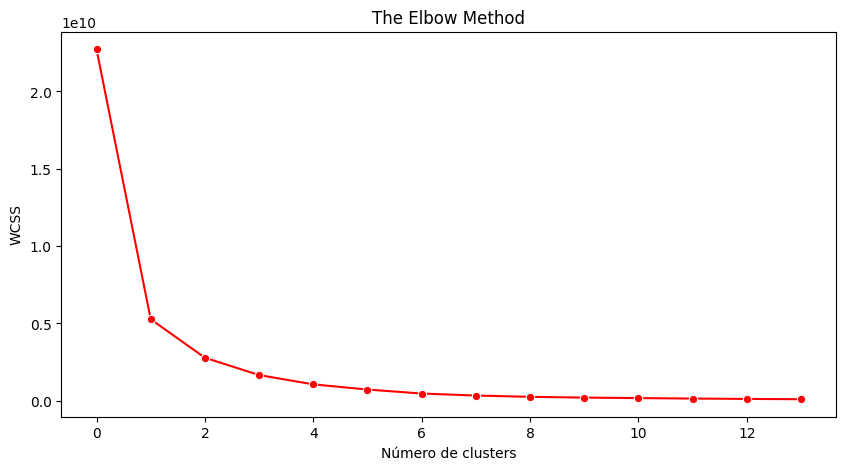

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

##**Agrupamento**

###Decisão de adotar 2 clusters

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 5, max_iter = 300)


In [ ]:
kmeans1 = kmeans.fit(df2[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Coordenadas dos Centróides
centroides = kmeans1.cluster_centers_
centroides

array([[ 4493.98704172,   134.3625    ],
       [24484.74576271,   520.76610169]])

In [ ]:
# Classificação dos dados
classificacao = kmeans1.labels_
classificacao

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
graf1 = px.scatter(x = dados_1[:,0], y = dados_1[:,1], color=classificacao)
graf2 = px.scatter(x = centroides[:,0], y = centroides[:,1], size = [15, 15])
graf3 = go.Figure(data = graf1.data + graf2.data)
graf3.update_layout(width=800,height=500,title_text='Agrupamento K-Means')
graf3.update_xaxes(title = 'PIB per capta')
graf3.update_yaxes(title = 'QTD Telefone (por 1000)')
graf3.show()

In [ ]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo_Kmeans_2_atributos'])
agrupamento

,Grupo_Kmeans_2_atributos
0,0
1,0
2,0
3,0
4,1
...,...
222,0
223,0
224,0
225,0


In [ ]:
df3 = pd.concat([df, agrupamento],axis=1)
df3.head(1)

,País,Região,População,Área (m²),Pop. Densidade (por milha quadrada),Litoral (relação costa/área),Migração líquida,Mortalidade infantil (por 1000 nascimentos),PIB ($ per capita),Alfabetização (%),...,Plantações (%),Outro (%),Clima,Taxa de natalidade,Índice de mortalidade,Agricultura,Industria,Serviços,Codes,Grupo_Kmeans_2_atributos
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.06,163.07,700.0,"36,0",...,0.22,87.65,1,46.6,20.34,"0,38","0,24","0,38",AFG,0


In [ ]:
graf2 = px.choropleth(df3,locations='Codes',color='Grupo_Kmeans_2_atributos',color_continuous_scale='RdBu')
graf2.show()

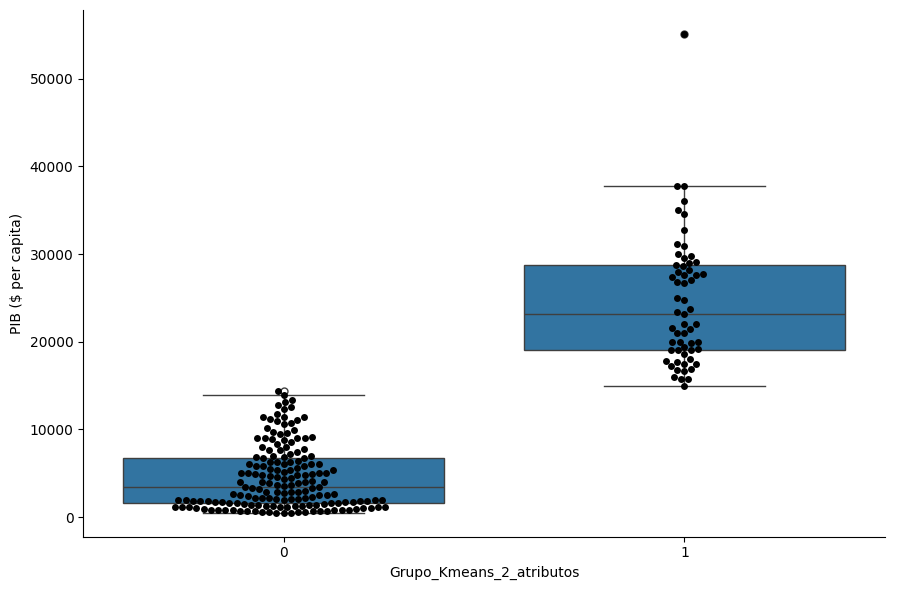

In [ ]:
sns.catplot(x='Grupo_Kmeans_2_atributos',y='PIB ($ per capita)',kind='box',data=df3,height=6,aspect=1.5)
sns.swarmplot(x='Grupo_Kmeans_2_atributos',y='PIB ($ per capita)',data=df3,color='black')
plt.show()

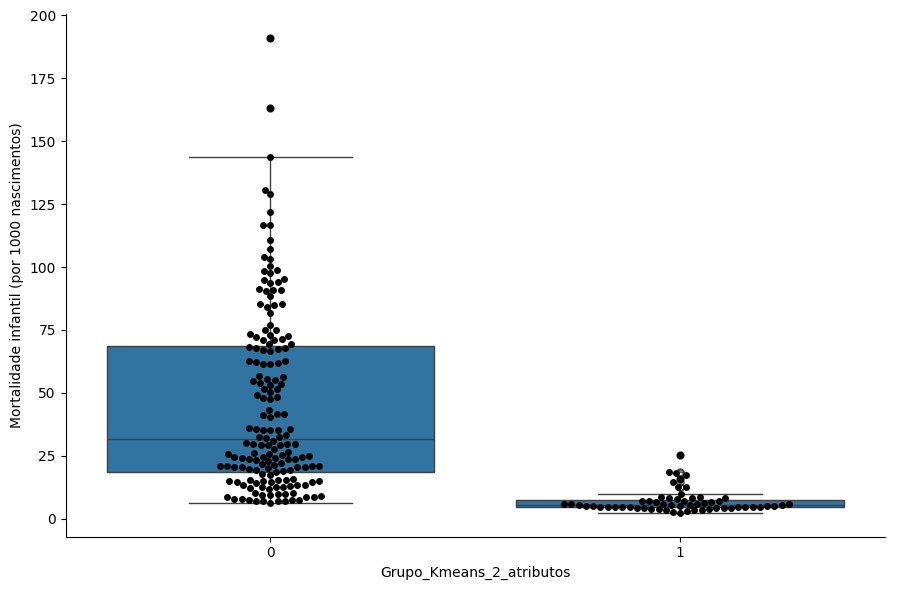

In [ ]:
sns.catplot(x='Grupo_Kmeans_2_atributos',y='Mortalidade infantil (por 1000 nascimentos)',kind='box',data=df3,height=6,aspect=1.5)
sns.swarmplot(x='Grupo_Kmeans_2_atributos',y='Mortalidade infantil (por 1000 nascimentos)',data=df3,color='black')
plt.show()

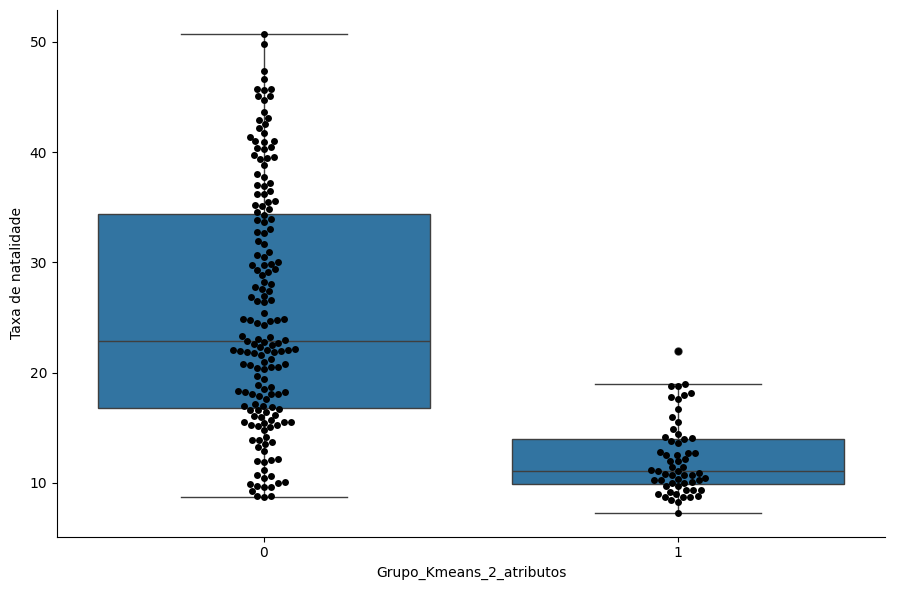

In [ ]:
sns.catplot(x='Grupo_Kmeans_2_atributos',y='Taxa de natalidade',kind='box',data=df3,height=6,aspect=1.5)
sns.swarmplot(x='Grupo_Kmeans_2_atributos',y='Taxa de natalidade',data=df3,color='black')
plt.show()

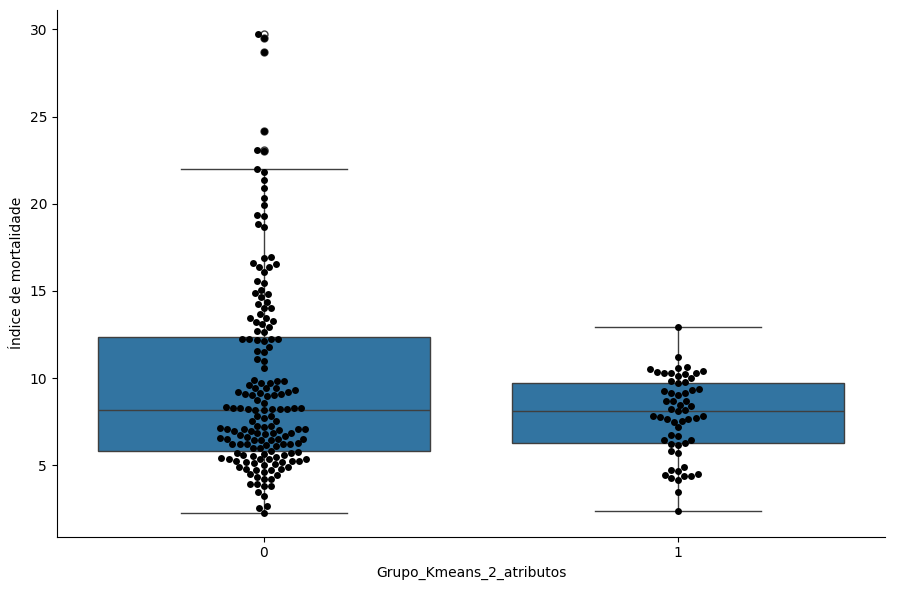

In [ ]:
sns.catplot(x='Grupo_Kmeans_2_atributos',y='Índice de mortalidade',kind='box',data=df3,height=6,aspect=1.5)
sns.swarmplot(x='Grupo_Kmeans_2_atributos',y='Índice de mortalidade',data=df3,color='black')
plt.show()

## **K-MEANS COM TODOS ATRIBUTOS**

In [ ]:
df2_esc

array([[ 0.01969468,  0.02758332, -0.19984434, ..., -1.0262679 ,
         2.2105282 ,  2.24943167],
       [-0.21387688, -0.31879748, -0.15360296, ..., -0.72493712,
        -0.632086  , -0.81453096],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.69436091,
        -0.44883714, -0.93814321],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.87560251,
         1.8756251 , -0.19039043],
       [-0.14654488,  0.08642673, -0.21958445, ..., -1.00411123,
         1.70501409,  2.16634803],
       [-0.14029829, -0.11624192, -0.20992568, ..., -0.9216884 ,
         0.53240187,  2.55339622]])

In [ ]:
df2_esc.shape

(227, 9)

**Elbow Method**

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 5, max_iter = 300)
    kmeans.fit(df2_esc)
# Método inertia para gerar o wcss
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

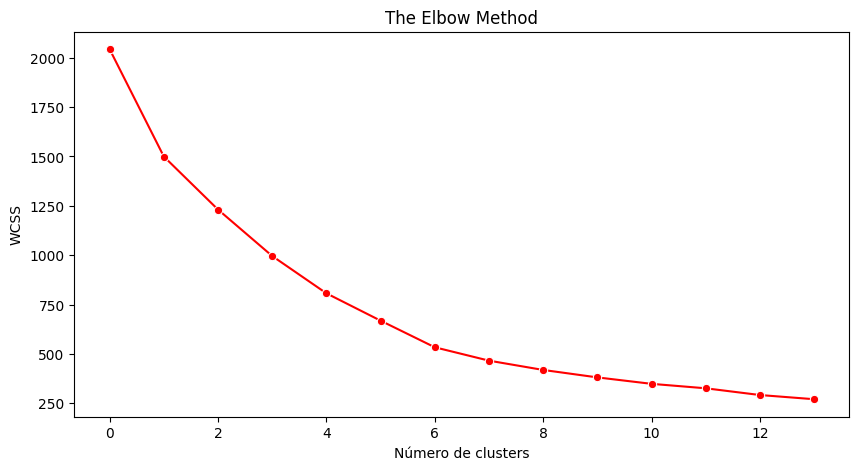

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS');

**Agrupamento**

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 5, max_iter = 300)


In [ ]:
kmeans2 = kmeans.fit(df2_esc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# Coordenadas dos Centróides
centroides = kmeans2.cluster_centers_
centroides

array([[-0.08247329, -0.05125137, -0.18114869, -0.27169472,  1.50938177,
        -0.78238259, -0.9659265 ,  1.40260832,  1.28263324],
       [-0.10663257, -0.14998642, -0.12215047,  0.10139783, -0.27508997,
        -0.37248364, -0.28729604, -0.13619005, -0.52609989],
       [ 3.51087442,  4.92525456, -0.18246717, -0.28702621, -0.43622588,
         0.75922688,  0.75341954, -0.72158264, -0.14870386],
       [-0.24226064, -0.33488238,  9.5671378 ,  2.14272981, -0.87216814,
         1.3503734 ,  2.10690751, -1.19853263, -0.11135964],
       [-0.14459937, -0.26325312,  0.09032635,  0.01912821, -0.80740196,
         1.32235106,  1.30395752, -0.92938182, -0.16733978]])

In [ ]:
# Inversão do escalonamento
escala.inverse_transform(kmeans2.cluster_centers_)

array([[1.90388382e+07, 5.06674868e+05, 7.89698113e+01, 1.56867925e+00,
        8.84469811e+01, 1.86226415e+03, 1.68169811e+01, 3.76500000e+01,
        1.55690566e+01],
       [1.61969492e+07, 3.30301028e+05, 1.76701835e+02, 2.84788991e+01,
        2.58535492e+01, 5.96320939e+03, 1.69960550e+02, 2.06034516e+01,
        6.64334564e+00],
       [4.41729243e+08, 9.39637929e+06, 7.67857143e+01, 4.62857143e-01,
        2.02014286e+01, 1.72857143e+04, 4.04814286e+02, 1.41185714e+01,
        8.50571429e+00],
       [2.42834000e+05, 1.50000000e+01, 1.62272500e+04, 1.75715000e+02,
        4.91000000e+00, 2.32000000e+04, 7.10250000e+02, 8.83500000e+00,
        8.69000000e+00],
       [1.17308623e+07, 1.27968821e+05, 5.28675000e+02, 2.25450000e+01,
        7.18178571e+00, 2.29196429e+04, 5.29051786e+02, 1.18166071e+01,
        8.41375000e+00]])

In [ ]:
# Classificação dos dados
classificacao2 = kmeans2.labels_
classificacao2

array([0, 1, 1, 1, 4, 0, 1, 4, 1, 1, 4, 2, 4, 1, 4, 1, 1, 4, 1, 4, 1, 0,
       4, 0, 1, 1, 0, 2, 4, 1, 1, 0, 1, 0, 0, 0, 2, 1, 4, 0, 0, 1, 2, 1,
       0, 0, 0, 1, 1, 0, 4, 1, 1, 4, 4, 0, 1, 1, 1, 1, 1, 1, 0, 0, 4, 0,
       4, 1, 4, 4, 1, 1, 0, 0, 1, 1, 4, 1, 4, 4, 4, 1, 1, 4, 1, 4, 0, 0,
       1, 0, 1, 4, 4, 4, 2, 1, 1, 1, 4, 4, 4, 4, 1, 4, 4, 1, 1, 0, 1, 1,
       4, 1, 1, 0, 4, 1, 0, 0, 1, 4, 1, 4, 3, 1, 0, 0, 1, 1, 0, 4, 1, 4,
       0, 1, 0, 1, 1, 1, 3, 1, 1, 1, 0, 0, 1, 0, 4, 1, 1, 4, 1, 0, 0, 1,
       4, 1, 0, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 2, 0, 1, 4, 1, 4, 1,
       1, 4, 1, 1, 0, 1, 1, 0, 4, 1, 4, 1, 0, 0, 4, 1, 0, 1, 0, 4, 4, 1,
       4, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 4, 2, 1, 1, 1, 1, 1,
       4, 1, 1, 1, 0, 0, 0], dtype=int32)

In [ ]:
agrupamento2 = pd.DataFrame(classificacao2, columns = ['Grupo_Kmeas_todos'])
agrupamento2

,Grupo_Kmeas_todos
0,0
1,1
2,1
3,1
4,4
...,...
222,1
223,1
224,0
225,0


In [ ]:
df4 = pd.concat([df3, agrupamento2],axis=1)
df4.head(1)

,País,Região,População,Área (m²),Pop. Densidade (por milha quadrada),Litoral (relação costa/área),Migração líquida,Mortalidade infantil (por 1000 nascimentos),PIB ($ per capita),Alfabetização (%),...,Outro (%),Clima,Taxa de natalidade,Índice de mortalidade,Agricultura,Industria,Serviços,Codes,Grupo_Kmeans_2_atributos,Grupo_Kmeas_todos
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.06,163.07,700.0,"36,0",...,87.65,1,46.6,20.34,"0,38","0,24","0,38",AFG,0,0


In [ ]:
graf3 = px.choropleth(df4,locations='Codes',color='Grupo_Kmeas_todos',color_continuous_scale='PuBuGn')
graf3.show()

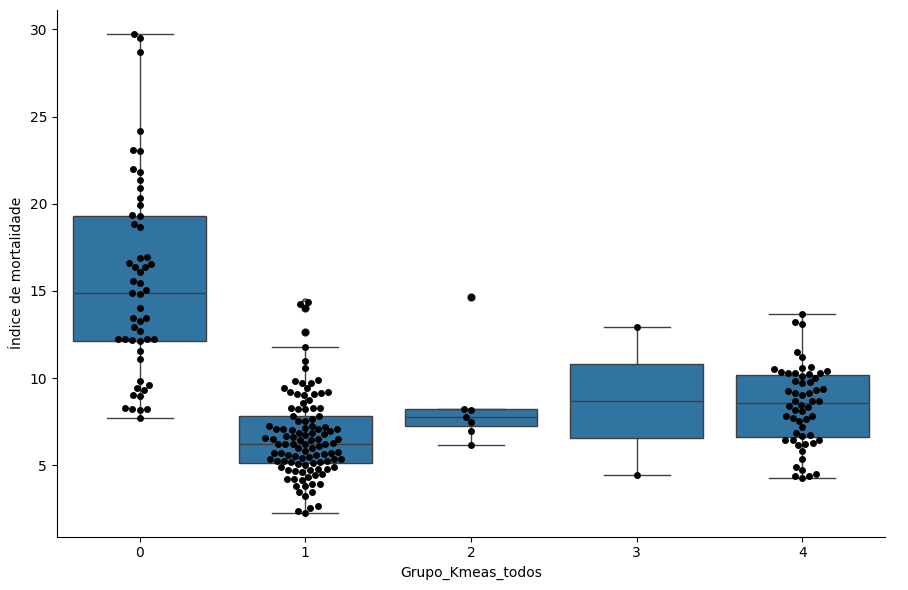

In [ ]:
sns.catplot(x='Grupo_Kmeas_todos',y='Índice de mortalidade',kind='box',data=df4,height=6,aspect=1.5)
sns.swarmplot(x='Grupo_Kmeas_todos',y='Índice de mortalidade',data=df4,color='black')
plt.show()

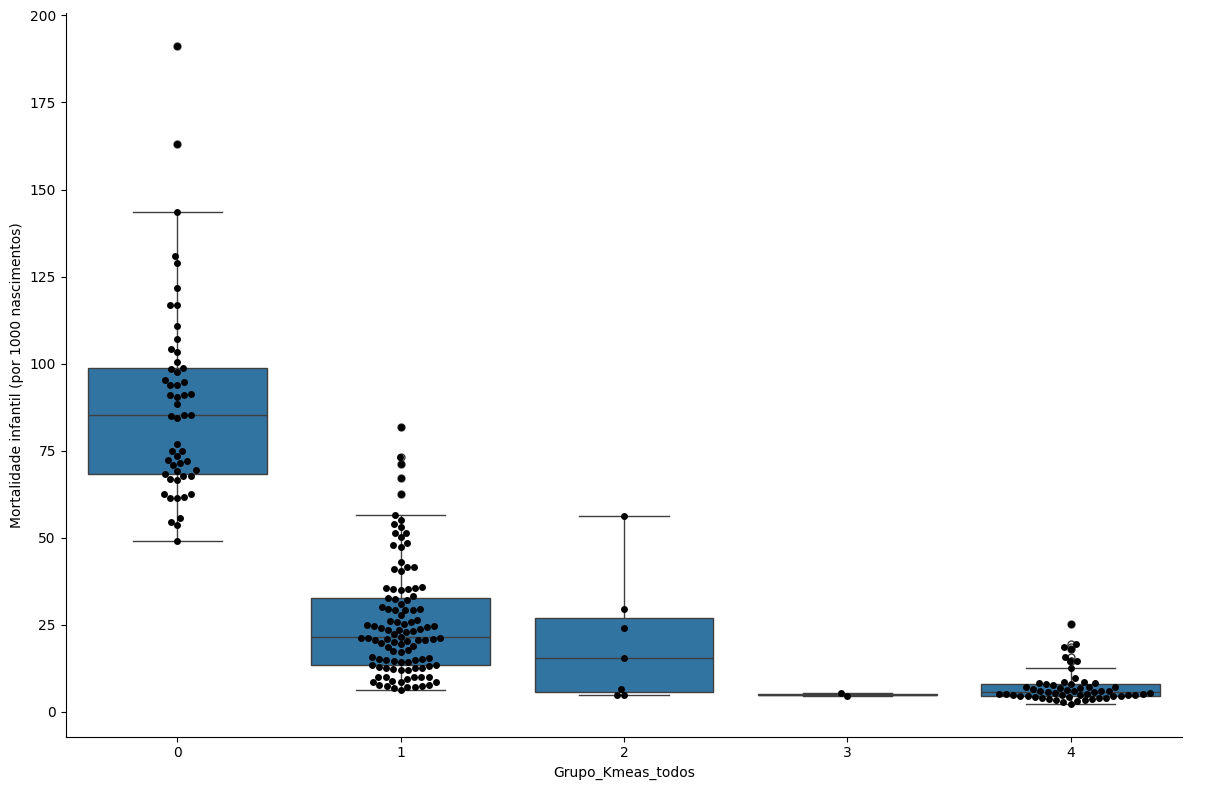

In [ ]:
sns.catplot(x='Grupo_Kmeas_todos',y='Mortalidade infantil (por 1000 nascimentos)',kind='box',data=df4,height=8,aspect=1.5)
sns.swarmplot(x='Grupo_Kmeas_todos',y='Mortalidade infantil (por 1000 nascimentos)',data=df4,color='black')
plt.show()

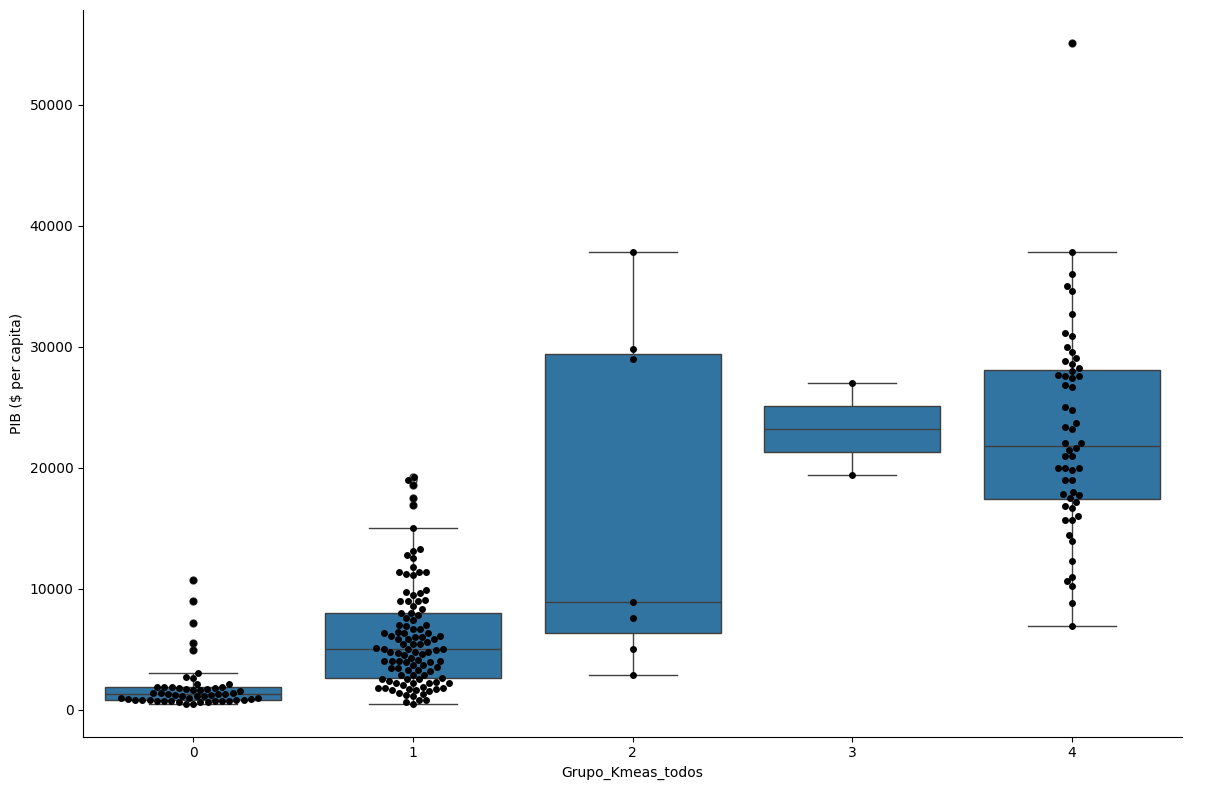

In [ ]:
sns.catplot(x='Grupo_Kmeas_todos',y='PIB ($ per capita)',kind='box',data=df4,height=8,aspect=1.5)
sns.swarmplot(x='Grupo_Kmeas_todos',y='PIB ($ per capita)',data=df4,color='black')
plt.show()

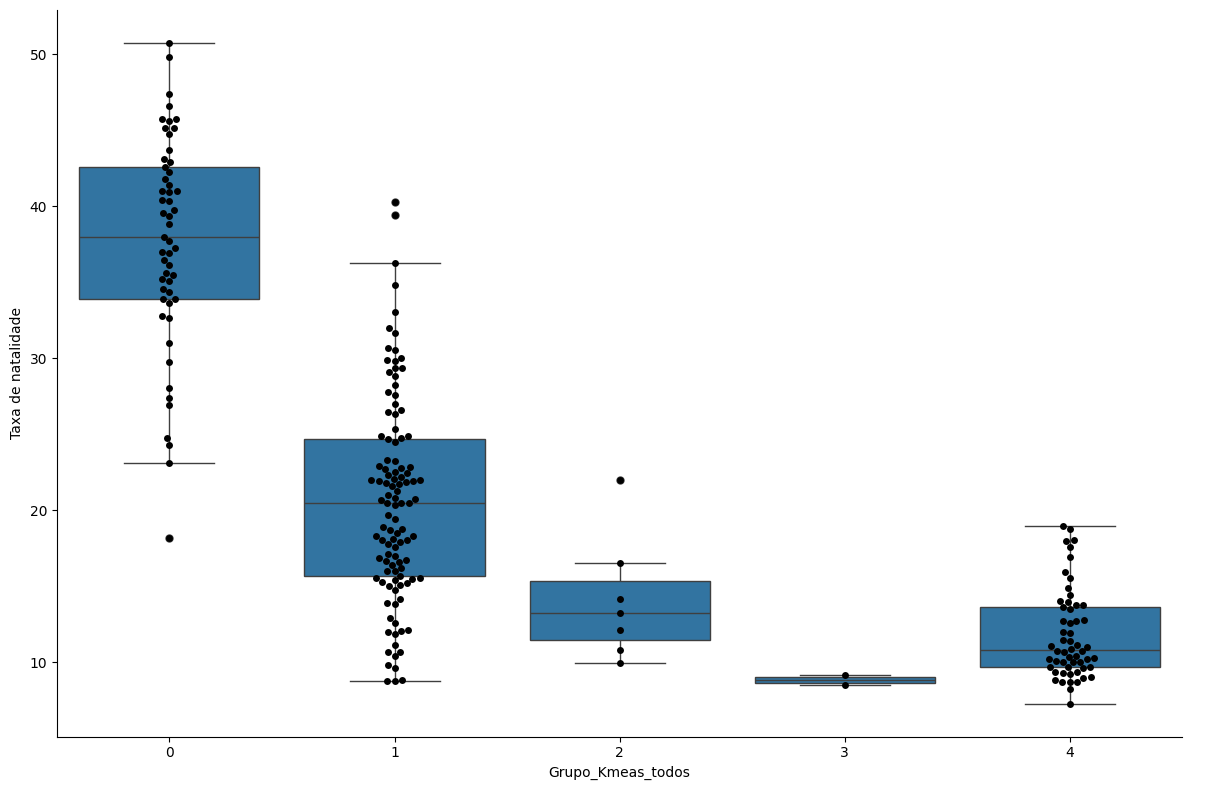

In [ ]:
sns.catplot(x='Grupo_Kmeas_todos',y='Taxa de natalidade',kind='box',data=df4,height=8,aspect=1.5)
sns.swarmplot(x='Grupo_Kmeas_todos',y='Taxa de natalidade',data=df4,color='black')
plt.show()

In [ ]:
df4[df4['Grupo_Kmeas_todos'] == 3]

,País,Região,População,Área (m²),Pop. Densidade (por milha quadrada),Litoral (relação costa/área),Migração líquida,Mortalidade infantil (por 1000 nascimentos),PIB ($ per capita),Alfabetização (%),...,Outro (%),Clima,Taxa de natalidade,Índice de mortalidade,Agricultura,Industria,Serviços,Codes,Grupo_Kmeans_2_atributos,Grupo_Kmeas_todos
122,Macau,ASIA (EX. NEAR EAST),453125,28,16183.0,146.43,4.86,4.39,19400.0,"94,5",...,100.0,2,8.48,4.47,"0,001","0,072","0,927",MAC,1,3
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.00,7.75,5.43,27000.0,"99,0",...,100.0,NaN,9.19,12.91,"0,17",NaN,NaN,MCO,1,3


## **ALGORITMO HIERÁRQUICO: todos atributos**






In [ ]:
df2.head(1)

,População,Área (m²),Pop. Densidade (por milha quadrada),Litoral (relação costa/área),Mortalidade infantil (por 1000 nascimentos),PIB ($ per capita),Telefones (por 1.000),Taxa de natalidade,Índice de mortalidade,Cluster
0,31056997,647500,48.0,0.0,163.07,700.0,3.2,46.6,20.34,0


In [ ]:
df2_esc

array([[ 0.01969468,  0.02758332, -0.19984434, ..., -1.0262679 ,
         2.2105282 ,  2.24943167],
       [-0.21387688, -0.31879748, -0.15360296, ..., -0.72493712,
        -0.632086  , -0.81453096],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.69436091,
        -0.44883714, -0.93814321],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.87560251,
         1.8756251 , -0.19039043],
       [-0.14654488,  0.08642673, -0.21958445, ..., -1.00411123,
         1.70501409,  2.16634803],
       [-0.14029829, -0.11624192, -0.20992568, ..., -0.9216884 ,
         0.53240187,  2.55339622]])

In [ ]:
df2_esc.shape

(227, 9)

**Dendrograma**

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

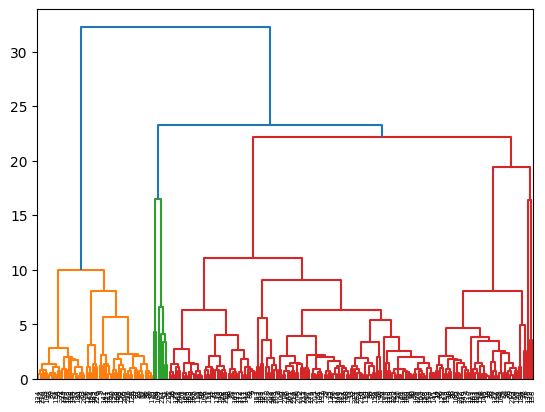

In [ ]:
dendrograma = dendrogram(linkage(df2_esc, method = 'ward'))

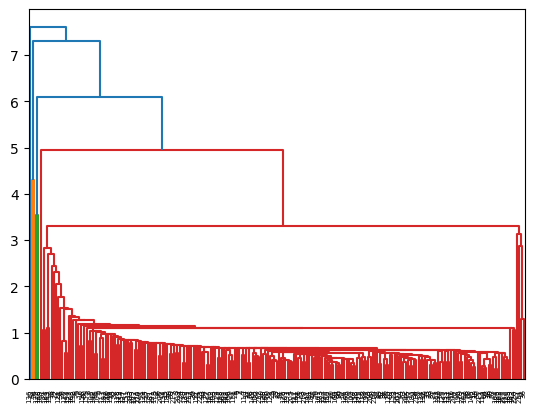

In [ ]:
dendrograma = dendrogram(linkage(df2_esc, method = 'single'))

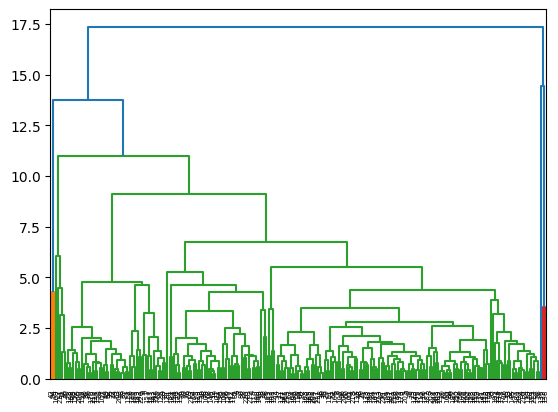

In [ ]:
dendrograma = dendrogram(linkage(df2_esc, method = 'complete'))

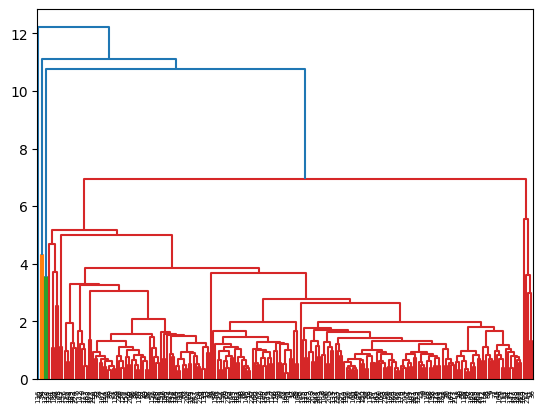

In [ ]:
dendrograma = dendrogram(linkage(df2_esc, method = 'average'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'ward')
classificacao3 = hier.fit_predict(df2_esc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
classificacao3

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1])

**Agrupamento**

In [ ]:
agrupamento3 = pd.DataFrame(classificacao3, columns = ['Grupo Dendrograma'])
agrupamento3

,Grupo Dendrograma
0,1
1,0
2,0
3,0
4,0
...,...
222,0
223,0
224,1
225,1


In [ ]:
df5 = pd.concat([df4, agrupamento3],axis=1)
df5.head(1)

,País,Região,População,Área (m²),Pop. Densidade (por milha quadrada),Litoral (relação costa/área),Migração líquida,Mortalidade infantil (por 1000 nascimentos),PIB ($ per capita),Alfabetização (%),...,Clima,Taxa de natalidade,Índice de mortalidade,Agricultura,Industria,Serviços,Codes,Grupo_Kmeans_2_atributos,Grupo_Kmeas_todos,Grupo Dendrograma
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.0,23.06,163.07,700.0,"36,0",...,1,46.6,20.34,"0,38","0,24","0,38",AFG,0,0,1


In [ ]:
graf4 = px.choropleth(df5,locations='Codes',color='Grupo Dendrograma',color_continuous_scale='YlGn')
graf4.show()

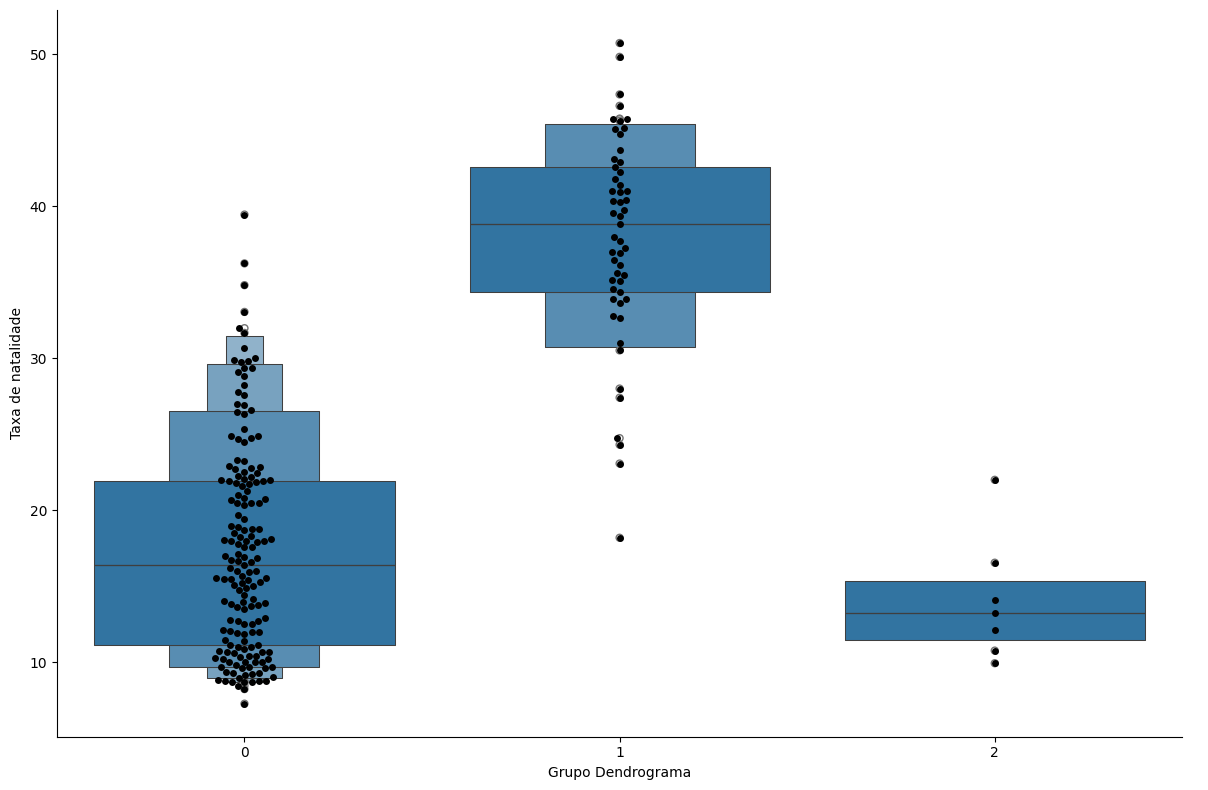

In [ ]:
sns.catplot(x='Grupo Dendrograma',y='Taxa de natalidade',kind='boxen',data=df5,height=8,aspect=1.5)
sns.swarmplot(x='Grupo Dendrograma',y='Taxa de natalidade',data=df5,color='black')
plt.show()

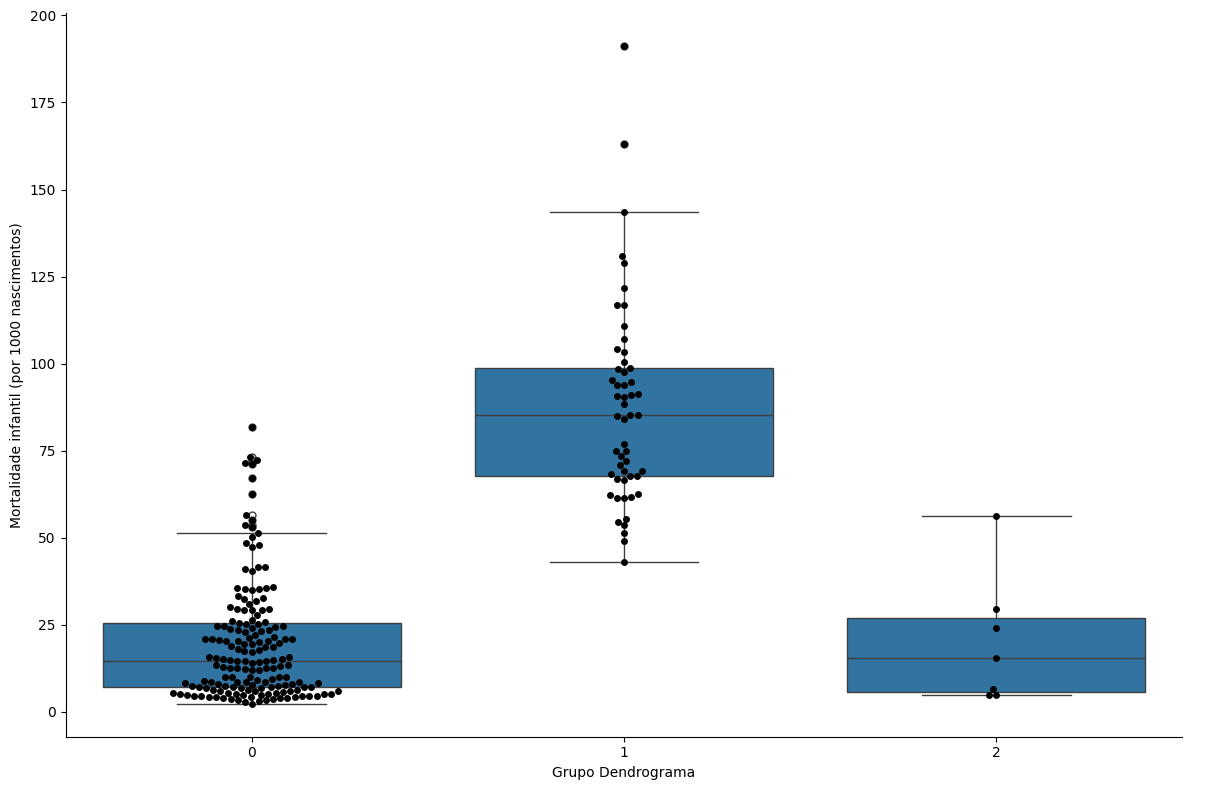

In [ ]:
sns.catplot(x='Grupo Dendrograma',y='Mortalidade infantil (por 1000 nascimentos)',kind='box',data=df5,height=8,aspect=1.5)
sns.swarmplot(x='Grupo Dendrograma',y='Mortalidade infantil (por 1000 nascimentos)',data=df5,color='black')
plt.show()

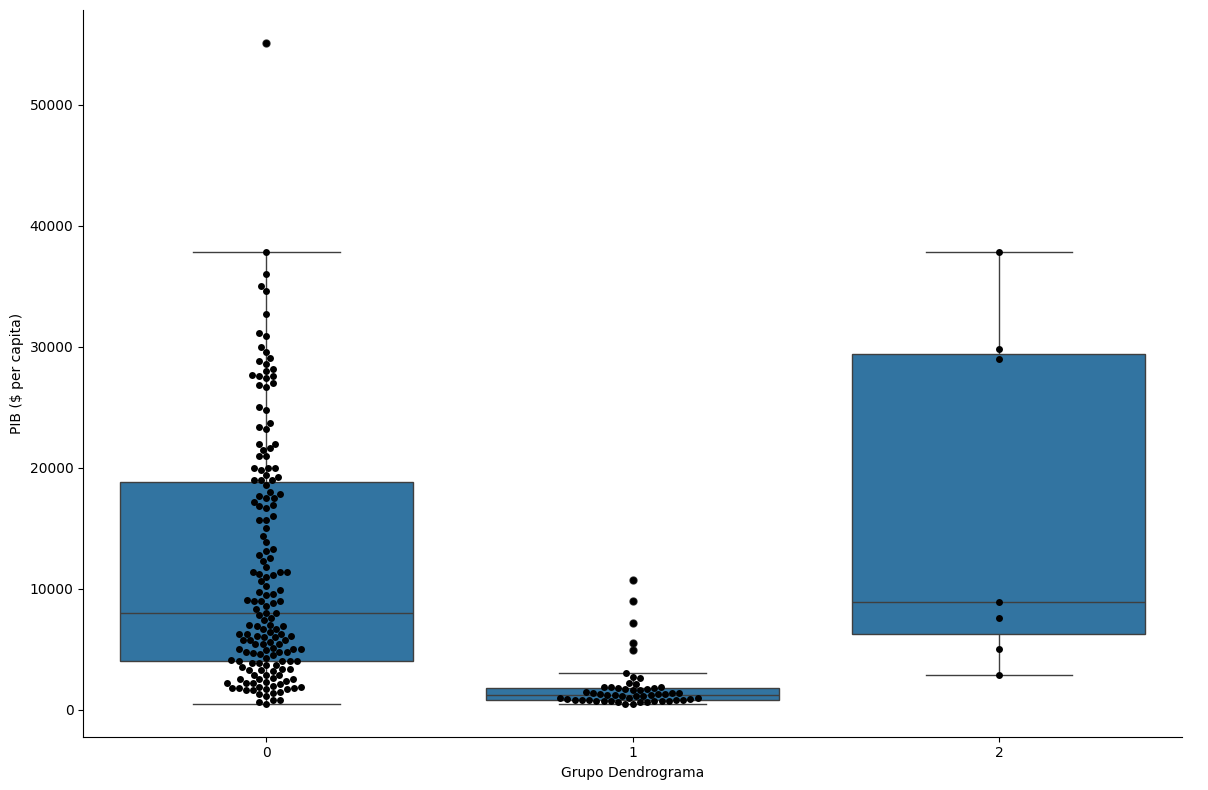

In [ ]:
sns.catplot(x='Grupo Dendrograma',y='PIB ($ per capita)',kind='box',data=df5,height=8,aspect=1.5)
sns.swarmplot(x='Grupo Dendrograma',y='PIB ($ per capita)',data=df5,color='black')
plt.show()

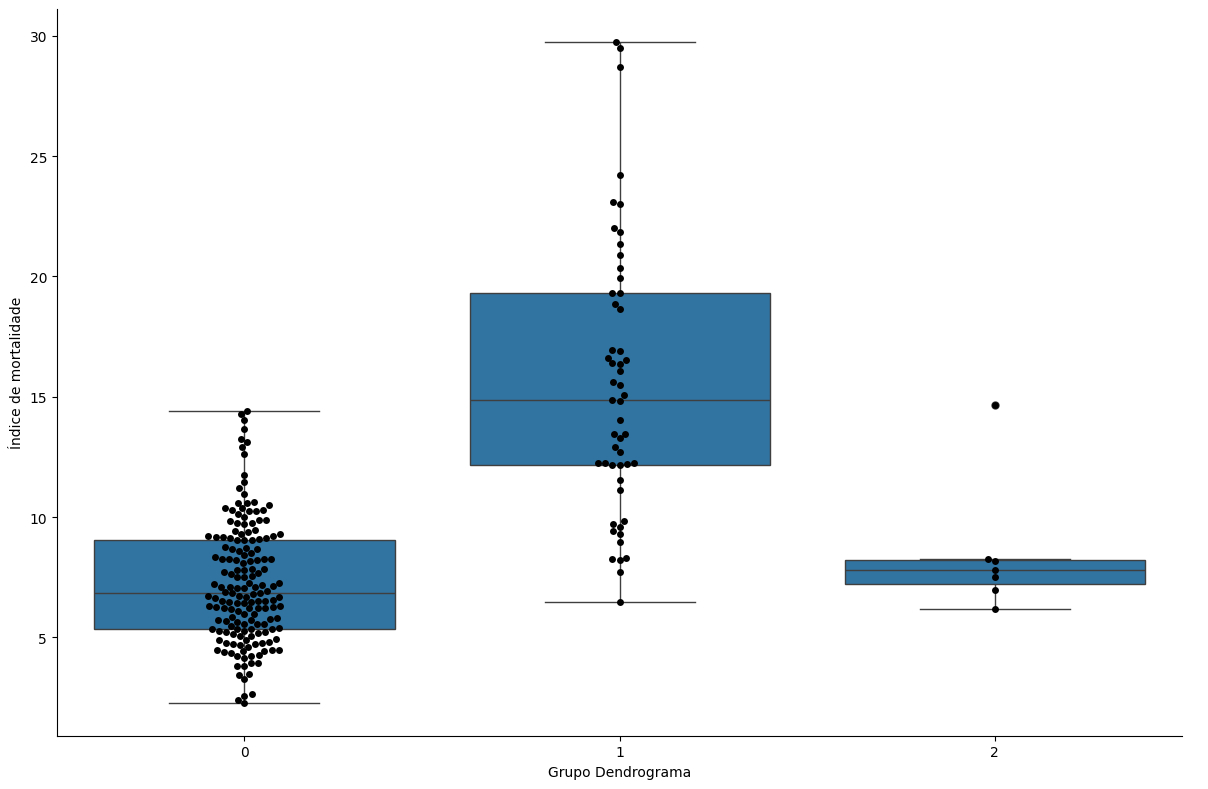

In [ ]:
sns.catplot(x='Grupo Dendrograma',y='Índice de mortalidade',kind='box',data=df5,height=8,aspect=1.5)
sns.swarmplot(x='Grupo Dendrograma',y='Índice de mortalidade',data=df5,color='black')
plt.show()